## Heavy Residue in Building 77 ##

The data about Heavy Residue (henceforth HR) contains information about the weight of each material class found in each unit(context). For the purpose of this analysis, all three fractions (4mm, 2mm and 1mm) were combined. The weights were standardized, and the values represent total weight of each material, dividied by the number of litres of soil. The data was exported from the Heavy Residue Database. 


**Importing necessary libraries**

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### 1 Inspecting Data

In [76]:
#importing data
df = pd.read_csv('Building77.csv')

In [77]:
#Checking the number of records. The dataframe contains 308 records and 31 columns.
df.shape

(308, 31)

In [78]:
#Checking the information stored in each column
df.columns

Index(['UNIT', 'Sample', 'Flot Number', 'GID', 'Sum of Flot Volume',
       'Clay Ball', 'Figurine', 'Clay Object', 'Shaped Clay', 'Pottery',
       'Stone', 'Worked Bone', 'Worked Stone', 'Beads ', 'Plant ', 'Bone ',
       'Mollusc ', 'Eggshell ', 'Obsidian ', 'Flint', 'Mound', 'Area',
       'Building', 'Space', 'Feature', 'DataCategory', 'Location',
       'Description', 'context', 'context subtype', 'Occ Phase'],
      dtype='object')

In [79]:
#removing blank spaces from column names
df = df.rename(columns =lambda x: x.replace(' ',''))

df.columns

Index(['UNIT', 'Sample', 'FlotNumber', 'GID', 'SumofFlotVolume', 'ClayBall',
       'Figurine', 'ClayObject', 'ShapedClay', 'Pottery', 'Stone',
       'WorkedBone', 'WorkedStone', 'Beads', 'Plant', 'Bone', 'Mollusc',
       'Eggshell', 'Obsidian', 'Flint', 'Mound', 'Area', 'Building', 'Space',
       'Feature', 'DataCategory', 'Location', 'Description', 'context',
       'contextsubtype', 'OccPhase'],
      dtype='object')

In [80]:
#showing the first five rows 
df.head()

,UNIT,Sample,FlotNumber,GID,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,contextsubtype,OccPhase
0,22092,2,11429,22092.2.11429,5.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",NaN,activity,NaN,fire spots (non-structured),activity,activity,B77.1.A
1,19008,2,9196,19008.2.9196,20.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",6052,",fill,cut,burial,burial fill,burial fill,B77.6
2,19021,2,9222,19021.2.9222,28.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3601,",fill,cut,burial,burial fill,burial fill,B77.6
3,19044,2,9229,19044.2.9229,32.0,NaN,NaN,NaN,NaN,0.226875,...,North,77,",336,",",3600,",fill,cut,burial,burial fill,burial fill,B77.6
4,19295,2,9520,19295.2.9520,36.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3615,",fill,cut,burial,burial fill,burial fill,B77.7


At the first glance, we can see  there are  missing values.

In [81]:
#Finding the number of missing values in each column
df.isna().sum()

UNIT                 0
Sample               0
FlotNumber           0
GID                  0
SumofFlotVolume      0
ClayBall           294
Figurine           304
ClayObject         292
ShapedClay         294
Pottery            297
Stone              278
WorkedBone         302
WorkedStone        302
Beads              271
Plant               42
Bone                 5
Mollusc             37
Eggshell           153
Obsidian            57
Flint              289
Mound                0
Area                 0
Building             0
Space                0
Feature             89
DataCategory         0
Location             2
Description        111
context              0
contextsubtype       0
OccPhase             9
dtype: int64

It appears that the missing values (NaN) are the result of some samples not having some material types. For example, Unit 22092 did not have any clay balls, figurines, clay objects, shaped clay or pottery. Information about Feature, Description, LOcation and Occupation Phase is also missing for a number of records, which is fine. For example, not all units belong to a feature, and Location and Description for some Data Categories is never entered (e.g. ). Occupation phase though should exist for each unit. Therefore, these rows will be dropped when considering distribution of material in each occupation phase. 

In [82]:
#checking the type of information stored in each column. 
df.dtypes

UNIT                 int64
Sample               int64
FlotNumber           int64
GID                 object
SumofFlotVolume    float64
ClayBall           float64
Figurine           float64
ClayObject         float64
ShapedClay         float64
Pottery            float64
Stone              float64
WorkedBone         float64
WorkedStone        float64
Beads              float64
Plant              float64
Bone               float64
Mollusc            float64
Eggshell           float64
Obsidian           float64
Flint              float64
Mound               object
Area                object
Building             int64
Space               object
Feature             object
DataCategory        object
Location            object
Description         object
context             object
contextsubtype      object
OccPhase            object
dtype: object

It appears that the pandas read the file correctly. All numeric values are stored as floats or integeres, whereas other fields represent strings (text).

In [83]:
#Describing values in the table
df.describe()

,UNIT,Sample,FlotNumber,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,Stone,WorkedBone,WorkedStone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint,Building
count,308.000000,308.000000,308.000000,308.000000,14.000000,4.000000,16.000000,14.000000,11.000000,30.000000,6.000000,6.0,37.000000,266.000000,303.000000,271.000000,155.000000,251.000000,19.000000,308.0
mean,20197.188312,2.025974,9792.642857,17.299675,0.642061,0.053633,0.206102,0.460309,0.122193,0.495469,0.293339,0.0,0.021650,0.339928,1.035441,0.041482,0.010186,0.065659,0.023413,77.0
std,3402.298414,0.455842,1111.818188,19.401279,0.645235,0.038576,0.228708,0.775415,0.103651,1.396431,0.609772,0.0,0.033203,3.212798,1.846743,0.046206,0.021732,0.453180,0.020665,0.0
min,16400.000000,1.000000,7897.000000,0.100000,0.016176,0.015938,0.001538,0.002404,0.003974,0.024324,0.011000,0.0,0.000488,0.000455,0.001667,0.001111,0.000286,0.000690,0.002500,77.0
25%,19006.750000,2.000000,9196.750000,6.000000,0.160268,0.036395,0.031284,0.043393,0.037925,0.088333,0.019966,0.0,0.002273,0.006278,0.174000,0.010000,0.002000,0.010000,0.007636,77.0
50%,19424.000000,2.000000,9453.500000,13.500000,0.361349,0.045547,0.064688,0.093219,0.085000,0.191129,0.053199,0.0,0.006000,0.017639,0.485000,0.025517,0.004643,0.022857,0.019167,77.0
75%,21628.750000,2.000000,10945.250000,24.000000,0.994444,0.062784,0.355721,0.343333,0.206750,0.338815,0.086339,0.0,0.030000,0.054018,1.121116,0.055930,0.009167,0.043864,0.026628,77.0
max,30597.000000,5.000000,11993.000000,156.000000,2.293333,0.107500,0.631250,2.385909,0.303333,7.809091,1.536364,0.0,0.157241,50.714286,15.493125,0.336562,0.165714,7.162000,0.072353,77.0


The summary above gives the basic information about each column, such as, minimum,maximum, median, mean and standard deviation for each column. It shows that the standard deviation is quite high for some values, meaning that the samples are not normally distributed. 

### 2 Basic information about samples

In [84]:
# Checking number of samples from each context type
df['DataCategory'].value_counts()


fill                            123
construction/make-up/packing    104
floors (use)                     77
cluster                           3
activity                          1
Name: DataCategory, dtype: int64

Data Category represents the type of context. We can see that construction/make-up/packing (henceforth construction), fill, floors and burial fills are the categories worth exploring. Clusters should never have flotation samples (as they represent group of objects, and as such, they should not have any soil); therefore, this is a mistake. Also, as there is only one sample from the activity deposit, this will be removed as well.  

In [85]:
# removing cluster samples
df = df[df.DataCategory != 'cluster']
df = df[df.DataCategory != 'activity']

In [86]:
# renaming construction/make-up/packing 
df = df.replace('construction/make-up/packing','construction')

In [87]:
#Finding the total number of litres taken from each context type
df.groupby('DataCategory')['SumofFlotVolume'].sum()

DataCategory
construction    1239.4
fill            3012.4
floors (use)    1006.0
Name: SumofFlotVolume, dtype: float64

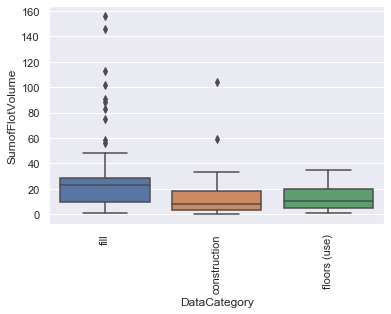

In [88]:
# visualising the volumes of each data category
sns.boxplot( x=df["DataCategory"], y=df['SumofFlotVolume'] );
plt.xticks(rotation=90);


We see that the fills have higher median volumes than the other two deposit types, and there are a number of samples with a much higher volume. 

### 3. How often are materials present in samples? 

In [89]:
#retrieving columns with material
cols= df.iloc[:, 5:20]
cols.columns
# Count of samples in which each material is present
ubiquity = df[cols.columns].count().sort_values(ascending=False)
ubiquity

Bone           299
Mollusc        267
Plant          262
Obsidian       248
Eggshell       153
Beads           37
Stone           30
Flint           19
ClayObject      15
ClayBall        14
ShapedClay      13
Pottery         11
WorkedStone      6
WorkedBone       6
Figurine         4
dtype: int64

''

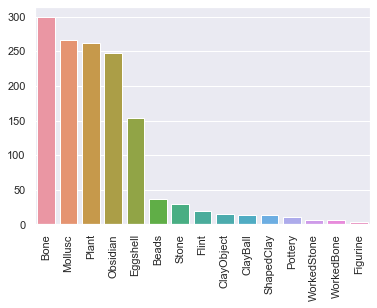

In [90]:
sns.barplot(x=ubiquity.index, y=ubiquity)
plt.xticks(rotation=90)
;

As shown above, animal bone is the most ubituous material and occurs in almost every sample. Other common materials are plant, mollusc, eggshell and obsidian. Other materials are less frequent and occur in less than 50 samples.

In [91]:
# counting number of times a material class exists in a context type
presence = df.groupby(['DataCategory'])[cols.columns].count()

# adding a column wiht total number of samples from each context
presence['samples'] = df.groupby(['DataCategory'])['DataCategory'].count()

#calculating percentages
for i in cols:
        presence[i]=round(presence[i]/presence['samples']*100,2)
#dropping the column with number of samples
presence = presence.drop(columns='samples')

#Showing results
presence


,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,Stone,WorkedBone,WorkedStone,Beads,Plant,Bone,Mollusc,Eggshell,Obsidian,Flint
DataCategory,,,,,,,,,,,,,,,
construction,3.85,0.00,4.81,3.85,0.00,7.69,1.92,1.92,2.88,75.96,96.15,83.65,40.38,71.15,7.69
fill,5.69,2.44,5.69,7.32,8.13,14.63,3.25,3.25,22.76,93.50,99.19,91.87,62.60,92.68,4.88
floors (use),3.90,1.30,3.90,0.00,1.30,5.19,0.00,0.00,7.79,88.31,100.00,87.01,44.16,77.92,6.49


As shown above, animal bone is the most ubituous material and occurs in almost every sample. Other common materials are plant, mollusc, eggshell and obsidian. Other materials are less frequent, though it should be noted that they all seem to occur more commonly  in  fills than in other types of deposits. 

### 4. What is the density of materials in different context types?

In [92]:
df.head()

,UNIT,Sample,FlotNumber,GID,SumofFlotVolume,ClayBall,Figurine,ClayObject,ShapedClay,Pottery,...,Area,Building,Space,Feature,DataCategory,Location,Description,context,contextsubtype,OccPhase
1,19008,2,9196,19008.2.9196,20.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",6052,",fill,cut,burial,burial fill,burial fill,B77.6
2,19021,2,9222,19021.2.9222,28.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3601,",fill,cut,burial,burial fill,burial fill,B77.6
3,19044,2,9229,19044.2.9229,32.0,NaN,NaN,NaN,NaN,0.226875,...,North,77,",336,",",3600,",fill,cut,burial,burial fill,burial fill,B77.6
4,19295,2,9520,19295.2.9520,36.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3615,",fill,cut,burial,burial fill,burial fill,B77.7
5,19471,5,9762,19471.5.9762,5.0,NaN,NaN,NaN,NaN,NaN,...,North,77,",336,",",3642,",fill,cut,burial,burial fill,burial fill,B77.5


In [93]:
# Replacing missing valuse with 0
df2 = df.copy()
df2 =df2.fillna(0)

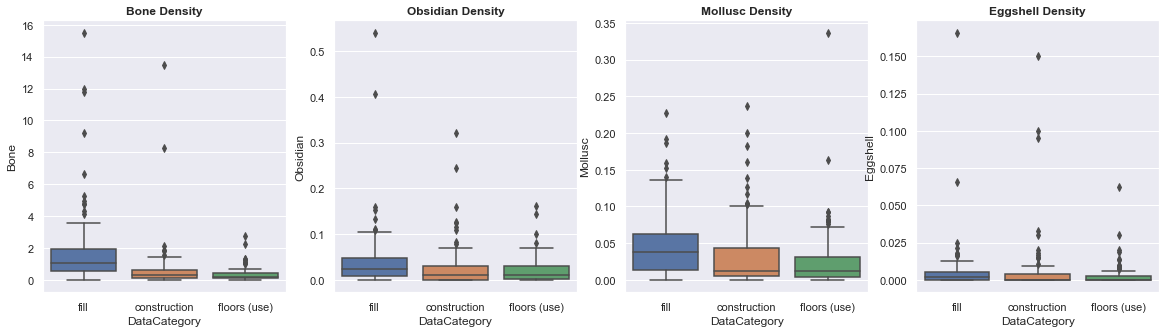

In [94]:
fix, ax = plt.subplots(nrows=1, ncols=4, figsize= (20,5))

sns.boxplot(df2["DataCategory"], df2['Bone'],
             ax=ax[0]);
ax[0].set_title("Bone Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Obsidian'],
             ax=ax[1]);
ax[1].set_title("Obsidian Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Mollusc'],
             ax=ax[2]);
ax[2].set_title("Mollusc Density", fontweight='bold');

sns.boxplot(df2["DataCategory"], df2['Eggshell'],
             ax=ax[3]);
ax[3].set_title("Eggshell Density", fontweight='bold');


As the values are normally distributed, there are a lot of outliers. 
Nevertheless, it is clear that all frequent materials have a higher density in burial fills than they do in other types of deposits. This points to the need for further examination of materials in burial fills, and their common interpretation in archaeology as accidental inclusions (rather than deliberate placement). 

''

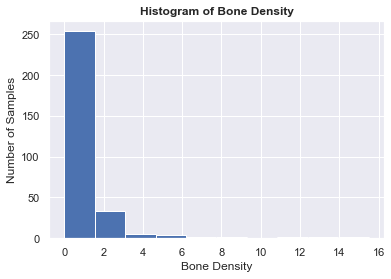

In [95]:
# showing distribution of bone

fig, ax = plt.subplots()

ax1 = df2['Bone'].hist(bins=10)
ax1.set_title("Histogram of Bone Density", fontweight='bold');
ax1.set_xlabel('Bone Density')
ax1.set_ylabel('Number of Samples')
;

We can also normalize the data by using Log10 transformation. However in this case, samples that contain no material will be excluded,as Log10 does not exist for 0.

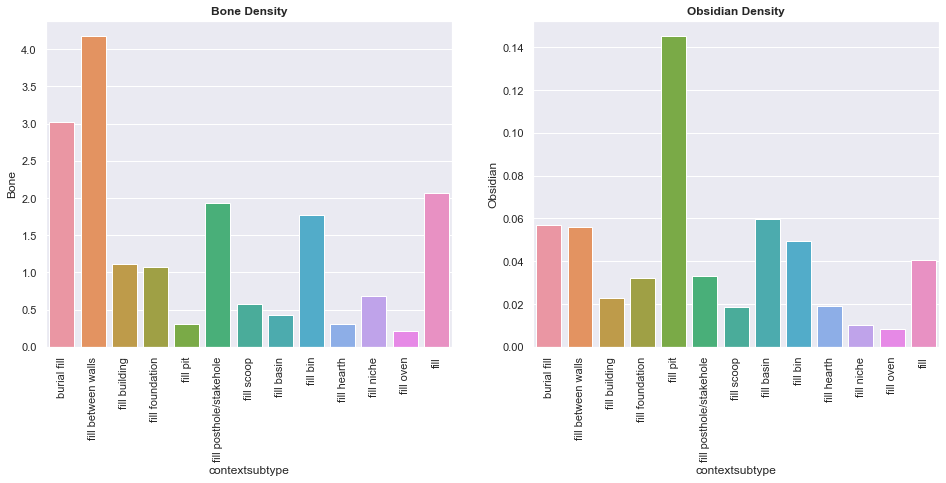

In [96]:
#comparing all fills

fills = df2.loc[df2['DataCategory']=='fill']

#plotting densities of Bone and obsidian 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

sns.barplot(fills["contextsubtype"], fills['Bone'],
             ax=ax[0], ci=None);
plt.xticks(rotation=90);
ax[0].set_title("Bone Density", fontweight='bold');
plt.xticks(rotation=90)

sns.barplot(fills["contextsubtype"], fills['Obsidian'],
             ax=ax[1], ci=None);
ax[1].set_title("Obsidian Density", fontweight='bold');

for a in ax:
    plt.sca(a)
    plt.xticks(rotation=90)



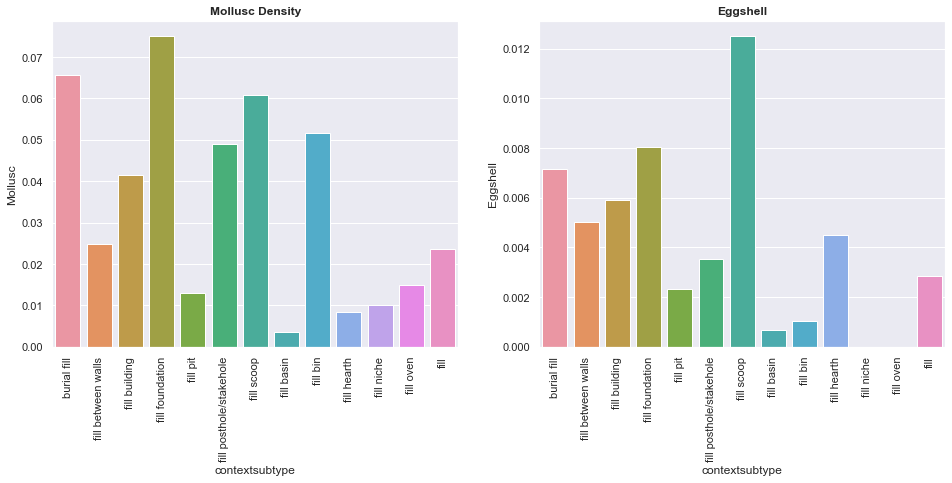

In [97]:
#plotting densities of Mollusc and Eggshell

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

sns.barplot(fills["contextsubtype"], fills['Mollusc'],
             ax=ax[0], ci=None);
plt.xticks(rotation=90);
ax[0].set_title("Mollusc Density", fontweight='bold');
plt.xticks(rotation=90)

sns.barplot(fills["contextsubtype"], fills['Eggshell'],
             ax=ax[1], ci=None);
ax[1].set_title("Eggshell", fontweight='bold');

for a in ax:
    plt.sca(a)
    plt.xticks(rotation=90)

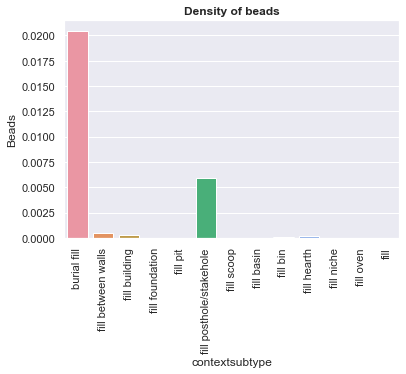

In [98]:
#Plotting density of beads

ax= sns.barplot(fills["contextsubtype"], fills['Beads'],
             ci=None)
plt.xticks(rotation=90);
ax.set_title("Density of beads", fontweight='bold');

df['Obsidian_Log10'] = round(np.log10(df['Obsidian']),2)
df.head(20)
post = df.loc[df['context subtype'] == 'fill posthole/stakehole']

post['Bone']